In [3]:
import numpy as np 
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
%matplotlib inline
import gc
gc.collect()

19

In [4]:
#导入数据集
import scipy.io as scio
dataFile = './lms.mat'
data = scio.loadmat(dataFile)

In [5]:
'''
得出X,Y值
'''
x = data['X'] 
y = data['y']

In [6]:
#看一下对不对
y[0]

array([10], dtype=uint8)

In [7]:
#看一下维度
x.shape

(5000, 400)

In [8]:
y.shape

(5000, 1)

In [9]:
# 切分训练集测试集
indices = np.random.permutation(x.shape[0])
valid_cnt = int(x.shape[0] * 0.3)#可自行修改比例
test_idx,training_idx=indices[:valid_cnt],indices[valid_cnt:]
x_test, x_train = x[test_idx,:], x[training_idx,:]
y_test, y_train = y[test_idx,:], y[training_idx,:]


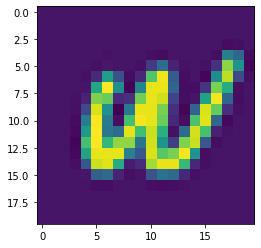

In [10]:
plt.imshow(x_train[0].reshape(20, 20))

In [11]:
#因原标签10对应图片数字0，现将其转化为标签0
#转为0-9
for i in range(len(y_train)):
    if y_train[i, 0] == 10:
        y_train[i, 0] = 0
        
#转为0-9
for i in range(len(y_test)):
    if y_test[i, 0] == 10:
        y_test[i, 0] = 0
y_train = np.transpose(y_train)[0]
y_test = np.transpose(y_test)[0]

In [12]:
'''
对y值进行one-hot编码，更适合后续sigmoid激活函数输出以及分类
'''
test_labels=[0,1,2,3,4,5,6,7,8,9]
adata_train=np.array(y_train)
adata_test=np.array(y_test)
def make_one_hot(data1):
    return (np.arange(10)==data1[:,None]).astype(np.integer)

y_train =make_one_hot(adata_train)   #(3500,10)
y_test =make_one_hot(adata_test)    #(1500,10)

In [13]:
y_train.shape

(3500, 10)

In [14]:
x_train.shape

(3500, 400)

In [15]:
#对数据集进行转置，以适应神经网络输入输出.
x_train = x_train.T    
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T
'''
x train:  (400, 3500)
x test:  (400, 1500)
y train:  (10, 3500)
y test:  (10, 1500)
'''

'\nx train:  (400, 3500)\nx test:  (400, 1500)\ny train:  (10, 3500)\ny test:  (10, 1500)\n'

Cost after iteration 0: 0.720286
Cost after iteration 100: 0.462561
Cost after iteration 200: 0.307282
Cost after iteration 300: 0.243103
Cost after iteration 400: 0.203756
Cost after iteration 500: 0.175334
Cost after iteration 600: 0.153462
Cost after iteration 700: 0.135894
Cost after iteration 800: 0.121733
Cost after iteration 900: 0.110062
Cost after iteration 1000: 0.100199
Cost after iteration 1100: 0.091752
Cost after iteration 1200: 0.084478
Cost after iteration 1300: 0.078173
Cost after iteration 1400: 0.072647
Cost after iteration 1500: 0.067750
Cost after iteration 1600: 0.063376
Cost after iteration 1700: 0.059441
Cost after iteration 1800: 0.055884
Cost after iteration 1900: 0.052660


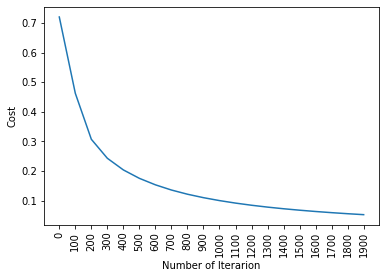

train accuracy: 98.22857142857143 %
test accuracy: 69.13333333333333 %


In [16]:
#定义激活函数sigmoid
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

#初始化参数并定义层
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(25,x_train.shape[0]) * 0.1,      
                  "bias1": np.zeros((25,1)),
                  "weight2": np.random.randn(y_train.shape[0], 25) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]   #(25, 400) (400，3500)  -->(25, 3500)
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]  # (10, 25) (25, 3500)
    A2 = sigmoid(Z2)          #(10, 3500)  #表示每一个输入对应10个标签中每个标签0-1的可能性，可能性最大的就是预测的标签值。
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

# 计算损失，这里采用交叉熵损失
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

# 反向传播
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

# 更新参数
def update_parameters_NN(parameters, grads, learning_rate = 0.5):     #learning_rate学习率
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

# 根据（10, 3500) ， 得出最终预测标签值
def predict_NN(parameters,x_test):
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.argmax(A2, axis=0)   #(1, 3500) 
    
    return Y_prediction


# 3层神经网络
def two_layer_neural_network(x_train, y_train,x_test, y_test, num_iterations):
    cost_list = []
    index_list = []
    #i初始化权值
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # 前向传播
        A2, cache = forward_propagation_NN(x_train,parameters)
        # 计算损失
        cost = compute_cost_NN(A2, y_train, parameters)
         # 反向传播
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # 更新参数
        parameters = update_parameters_NN(parameters, grads)
        # 打印损失值
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    #作出损失曲线
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # 在测试集上进行验证
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    #打印准确率
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - np.argmax(y_train, axis=0)) * 100)))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - np.argmax(y_test, axis=0)) * 100)))
    return parameters


#主函数
parameters = two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations=2000)

